### Image Processing - scc0251
### Assignment 01 - Image Enhancement

Authors: Moacir A. Ponti, Gabriel B. Cavallari, Vinicius da Costa



In [6]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [7]:
def inversion(img):
    """Function to perform inversion of intensity values"""    
    return 255-img

def contrast_modulation(img, c, d):
    """Function to perform contrast modulation
    Arguments:
        img -- input image
        c -- target minimum intensity
        d -- target maximum intensity
    """    
    modified_img = np.zeros(img.shape)
    a = float(np.min(img))
    b = float(np.max(img))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):            
            modified_img[x,y] = ((float(img[x,y])) - a)*((d-c)/(b-a)) + float(c)
    
    return modified_img

def logarithmic(img):
    """Function to perform logarithmic intensity transformation"""    
    modified_img = np.zeros(img.shape)
    c = 255.0 / np.log2(1.0 + np.max(img))
    modified_img = c * np.log2(1.0 + img)
    
    return modified_img

def gamma(img, W, g):
    """Function to perform Gamma adjustment
    Arguments:
            g - gamma parameter
    """    
    modified_img = np.zeros(img.shape)
    modified_img = W*(img**g)
    
    return modified_img

def calc_error(m,r):
    """Computing error from image reference to processed image"""    
    erro = np.sqrt(np.sum(np.square(m.astype(float) - r.astype(float))))
    
    return erro

### Example - inversion and constrast modulation


(-0.5, 1171.5, 1171.5, -0.5)

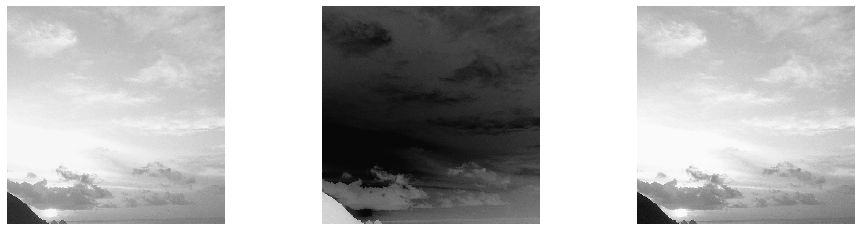

In [11]:
img1 = imageio.imread("images/airplane.png")
img2 = imageio.imread("images/sunset.png")
img3 = imageio.imread("images/arara.png")

img2_inverted = inversion(img2)
img2_contrast = contrast_modulation(img2, 1, 250)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(132)
plt.imshow(img2_inverted, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(133)
plt.imshow(img2_contrast, cmap="gray", vmin=0, vmax=255)
plt.axis('off')


### Example - log and gamma

(-0.5, 299.5, 299.5, -0.5)

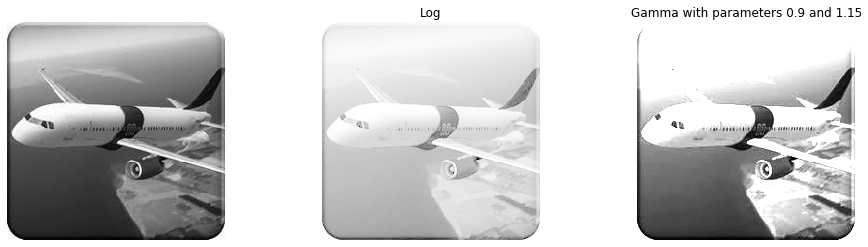

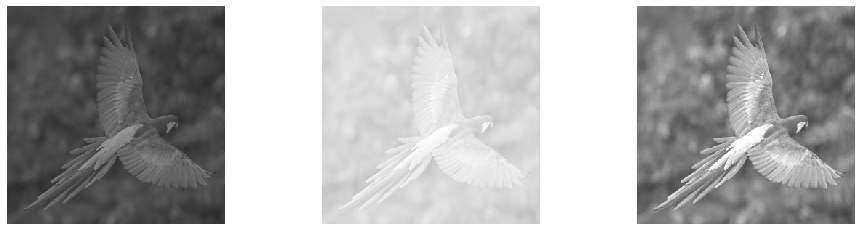

In [18]:
img1_log = logarithmic(img1)
img3_log = logarithmic(img3)
img1_gam = gamma(img1,0.9,1.15)
img3_gam = gamma(img3,0.9,1.15)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(132)
plt.imshow(img1_log, cmap="gray", vmin=0, vmax=255); plt.title('Log')
plt.axis('off')
plt.subplot(133)
plt.imshow(img1_gam, cmap="gray", vmin=0, vmax=255); plt.title('Gamma with parameters 0.9 and 1.15')
plt.axis('off')

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(132)
plt.imshow(img3_log, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(133)
plt.imshow(img3_gam, cmap="gray", vmin=0, vmax=255)
plt.axis('off')